# Regressão Linear

De forma bem simples, a regressão linear é um método que busca relações entre as variáveis. A relação parte de uma variável de interesse (dependente) com outras que a possam influenciar.

### Teoria da regressão linear

O termo linearidade em álgebra refere-se a uma relação linear entre duas ou mais variáveis. Se desenharmos esse relacionamento em um espaço bidimensional (2D), teremos uma linha reta. A regressão linear tem como função prever uma variável dependente (y) dada uma variável independente (x). Esta técnica encontra a relação linear entre a variável de entrada (input) `x` e a de saída (output) `y`. Quando x é uma variável única no modelo, chamamos de **Regressão Linear Simples** e quando há múltiplas entradas, chamamos de **Regressão Linear Múltipla**.

Exemplos: analisar a venda de um produto relacionada ao crescimento populacional de um país, analisar o preço de uma casa de uma região, pela quantidade de quartos que ela possui, analisar a taxa de mortalidade infantil em relação com o nível de formação escolar de uma população, etc.

Uma regressão linear simples é uma equação, tipicamente da forma `y = a + bx`

A ideia é tentar capturar como que mudanças na variável independente `x` afetam a variável dependente `y` (neste caso, supondo que esta dependência é linear). A variável independente é chamada também de *preditora* e a dependente de *resposta*.

**Importante**: Antes de tentar ajustar um modelo linear aos dados, é preciso determinar se existe ou não uma relação entre as variáveis. O gráfico de dispersão pode ser uma ótima ferramenta para mostrar a distribuição dos elementos.

#### Representação do modelo

A Regressão Linear Simples tem uma equação na seguinte forma:

`Y = β0 + β1X`

- Y - É o valor predito;
- β0 - É o coeficiente viés, esse coeficiente possibilita um grau extra de liberdade ao modelo;
- β1 - É chamado de fator de escala;
- X - É o valor da característica.

O mesmo conceito se aplica a Regressão Linear Múltipla, porém, com maior número de variáveis.

`Y = β0 + β1X1 + β1X2 ... βnXn`

#### Níveis de correlação:

-1 | -0,7 | -0,5 | -0,25 | 0 | 0,25 | 0,5 | 0,7 | 1
--|--|--|--|--|--|--|--|--|
perfeita| forte | moderada | fraca | inexistente | fraca | moderada | forte | perfeita

Os dados analisados serão de uma operação aérea de bombardeio da Segunda Guerra Mundial. O dataset contém informações das condições climáticas coletadas de cada dia das estações de clima pelo mundo. As informações incluem precipitação, queda de neve, temperaturas, velocidade do vento e se o dia teve tempestades ou outro tipo de condição adversa. 

Nossa tarefa será prever a temperatura máxima `y` tendo como referência a temperatura mínima `x`.

In [2]:
# Bibliotecas

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df_weather = pd.read_csv("dados/weather.csv", low_memory=False, usecols=['MaxTemp', 'MinTemp'])

df_weather.head()

,MaxTemp,MinTemp
0,25.555556,22.222222
1,28.888889,21.666667
2,26.111111,22.222222
3,26.666667,22.222222
4,26.666667,21.666667


In [4]:
df_weather.shape

(119040, 2)

In [5]:
df_weather.describe()

,MaxTemp,MinTemp
count,119040.000000,119040.000000
mean,27.045111,17.789511
std,8.717817,8.334572
min,-33.333333,-38.333333
25%,25.555556,15.000000
50%,29.444444,21.111111
75%,31.666667,23.333333
max,50.000000,34.444444


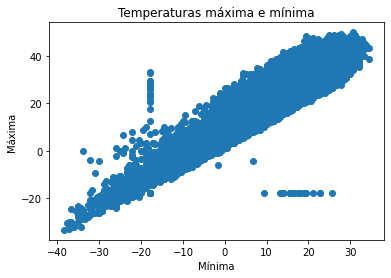

In [6]:
df_weather.plot(x='MinTemp', y='MaxTemp', style='o')  

plt.title('Temperaturas máxima e mínima')
plt.xlabel('Mínima')  
plt.ylabel('Máxima')
plt.legend().remove()
plt.show()

Podemos fazer um gráfico de distribuição e encontrarmos a média das temperaturas, que fica entre 25 e 35.

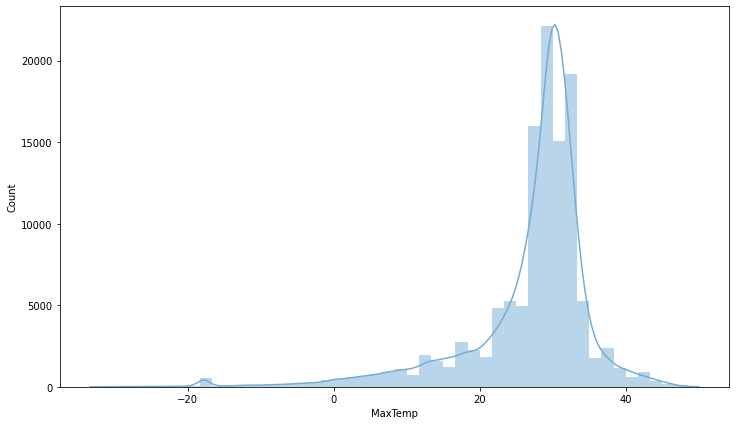

In [7]:
plt.figure(figsize=(12,7))
plt.tight_layout()

sns.histplot(df_weather['MaxTemp'], element="step", bins=50, kde=True, lw=0, color='#74acd4');

O próximo passo é dividir os dados em **atributos** (attributes) e **rótulos** (labels). Os atributos são as variáveis independentes e os rótulos são as dependentes que queremos prever. No nosso dataset temos apenas duas colunas, queremos prever a distância `y` que os motoristas conseguem enxergar a depender da idade `x`.

In [8]:
X = df_weather['MinTemp'].values.reshape(-1,1)
y = df_weather['MaxTemp'].values.reshape(-1,1)

Agora vamos fatiar nosso dataset em 80% para treinamento e 20% para teste. Através da propriedade test_size definimos a proporção dos dados de teste.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Depois do separar os dados de treinamento e testes, vamos treinar nosso algoritmo.

In [15]:
linear_regression = LinearRegression()  
linear_regression.fit(X_train, y_train) # treinar o algoritmo

LinearRegression()

O modelo de regressão linear encontra o melhor valor para a ponto e a inclinação da reta, o que resulta em uma linha que melhor se encaixa aos dados. Para ver estes valores calculados pelo algoritmo de regressão linear do dataset, basta executar os comandos:

In [27]:
#To retrieve the intercept:
print("Intercepto:", linear_regression.intercept_[0])

#For retrieving the slope:
print("Coeficiente:", linear_regression.coef_[0][0])

Intercepto: 10.694211596825387
Coeficiente: 0.9192607693174579


In [21]:
# Obter coeficiente de determinação r²
coeficiente_r2 = linear_regression.score(X_train, y_train)

#reta = 'y^ = ' + str(lr.intercept_[0]) + str(lr.coef_[0]) + 'x'

In [ ]:
coef = np.corrcoef(df[rotulo_x], df[rotulo_y])

In [22]:
print("Coeficiente de determinação r²", coeficiente_r2)

Coeficiente de determinação r² 0.7722934589095768


In [28]:
print("Correlação: " + 
          "{:.3f}".format(linear_regression.coef_[0][0]) + " | Determinação: {:.2f}".format(coeficiente_r2) +
          "\n Reta: y^ = {:.3f} + {:.3f} x".format(linear_regression.intercept_[0], linear_regression.coef_[0][0]))

Correlação: 0.919 | Determinação: 0.77
 Reta: y^ = 10.694 + 0.919 x


Este resultado significa que para cada unidade da temperatura mínima, a temperatura máxima é de 92%.

Agora vamos fazer algumas predições. Para isso, vamos usar os dados de teste e verificar a precisão (accuracy) que nosso algoritmo prevê os pontos percentuais.

---

### Referências

- [Real Python - Linear Regression in Python](https://realpython.com/linear-regression-in-python/)
- [Towards Datascience - A beginner’s guide to Linear Regression in Python with Scikit-Learn](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)
- [Medium - @lucasoliveira - Regressão Linear do zero com Python](https://medium.com/@lucasoliveiras/regress%C3%A3o-linear-do-zero-com-python-ef74a81c4b84)
- [Scikit-learn.org - sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- [Revista Brasileira de Meteorologia - Metodologia para análise de desempenho de simulações de sistemas convectivos na região metropolitana de São Paulo com o modelo ARPS: sensibilidade a variações com os esquemas de advecção e assimilação de dados](http://www.scielo.br/scielo.php?script=sci_arttext&pid=S0102-77862011000400009)